# Центральная предельная теорема

In [79]:
# здесь импортирую все необходимые библиотеки
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

# 1 часть задания
## Гистограмма выборки
В качестве непрерывного распределения я выбрал распределение Эрланга, которое является частным случаем гамма распределения(для того, чтобы получилось распределение Эрланга, параметр гамма распределения должен быть целым числом)

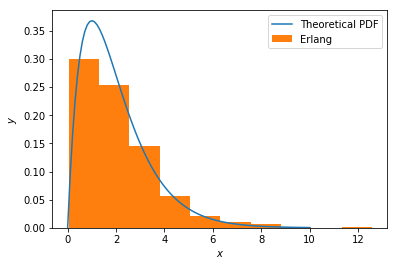

In [80]:
# генерирую выборку объема 1000
erlang_rv = sts.gamma(2)
sample = erlang_rv.rvs(1000)
# задаю х и расчитываю плотность вероятности(pdf), строю гистограмму и график теортической плотности
x = np.linspace(0, 10, 100)
pdf = erlang_rv.pdf(x)
plt.plot(x, pdf, label='Theoretical PDF')
plt.hist(sample, label='Erlang', density=True)
plt.legend()
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.show()

# 2 часть задания 
## Распределение выборочных средних

Согласно Центральной Предельной Теореме выборочные средние приближаются нормальным распределением с матожиданием изначального распределения и стандартным отклонением, равным корню из дисперсии / n.

В моем слумае матожидание равняется 2, дисперсия тоже равняется 2(из-за параметра распределение Эрланга).

In [81]:
# написал функию, которая сначала помещает в список 1000 сгенерированных выборок объема n
def gen_distribution (n):
    print 'n =', n
    means = []
    for i in range(1000):
        means.append(np.mean(erlang_rv.rvs(n)))

# задаю параметры для нормального распределения(матожидание и стандартное отклонение)  
# задаю само нормальное распределение с полученными параметрами
    m, sigma = 2, np.sqrt((2./n))
    norm_rv = sts.norm(loc=m, scale=sigma)
    
# расчитываю теоритеческую плотность вероятности (pdf) для нормального распределения, задаю х    
    x = np.linspace(-1, 5, 100)
    pdf = norm_rv.pdf(x)
# строю график теоретической плотности и гистограмму выборочных стредних
    plt.plot(x, pdf, label='Normal')
    plt.hist(means, label='Means', density=True)
    plt.legend()
    plt.ylabel('$y$')
    plt.xlabel('$x$')
    plt.show()

n = 5


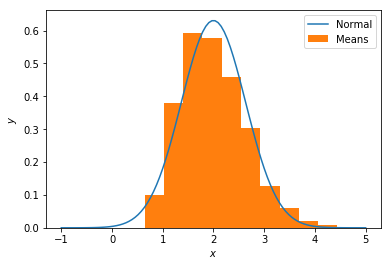

In [82]:
gen_distribution(5)

n = 10


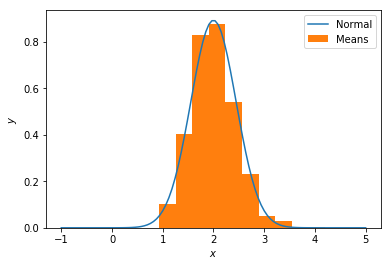

In [83]:
gen_distribution(10)

n = 15


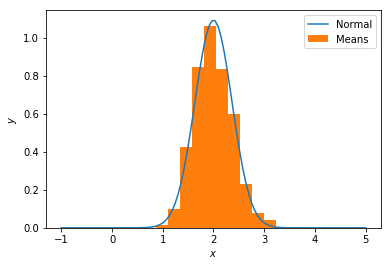

In [84]:
gen_distribution(15)

n = 50


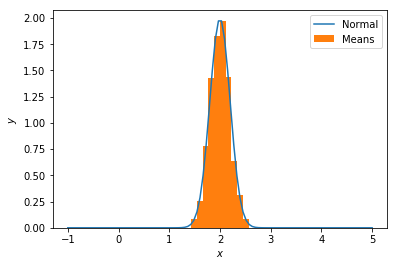

In [85]:
gen_distribution(50)

# Вывод
Из графиков можно видеть, что чем больше параметр n, отвечающий за объем выборки, тем лучше распределение выборочных средних соответсвует графику нормального распределения. При малом значении распределение выборочных средних не очень похоже на приближающее нормальное распределение и графики получаюся несимметричными, однако при большем n, например 50, распределение выборочных средних уже неплохо соответсвует нормальному.